# Final Project (100)

Tirumala Prasad Bade






# Prerequisite Code

In [1]:
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.metrics import *
import tensorflow as tf
import tensorflow_hub as hub # pre-trained models
import tensorflow_text as text # text pre-processing functions
from official.nlp import optimization  # to create AdamW optimizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from keras.backend import clear_session
import nltk
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

C:\Users\tirum\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\tirum\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file a

## 1.1 Problem Definition & Statement 

**1.1 A  First, use the code cell below to identify your group's selected dataset and the target variable (column name) that will be used for predictive modeling.**

In [3]:
# @title Identify Problem/Dataset

Dataset = 'airlines.csv' # @param ["lotion-reviews.csv", "spam.csv", "airlines.csv", "weightloss.csv", "amazon_reviews.csv"]
Target_Variable = 'overall_rating' # @param {type:"string"}

print(Dataset)
print(Target_Variable)


airlines.csv
overall_rating


**1.1 B (15) Next, use the text cell below for your problem definition and statement.**

**The problem statement should discuss the following: what is the problem and who it affects, financial/social implications of having a solution to the problem, how the model would be used in practice, and the acceptable level of model performance.**


Airline ratings and recommendations provide valuable feedback on the perceived effectiveness and efficiency of an airline's services and offerings. This dataset encapsulates the sentiments and experiences of airline customers, offering a view of satisfaction levels and areas of potential improvement. Without a robust system for analyzing this data, there are substantial missed opportunities for airlines to enhance their business processes. Improving customer satisfaction based on the customer ratings and recommendations has the potential to promote or revitalize customer loyalty. Increased customer loyalty, in turn, translates to a positive impact on revenue and possibly profits. In addition, addressing the insights derived from this feedback can directly impact the overall customer experience. Content customers not only benefit the individual but also contribute to a more positive reputation for the airline as a whole.

The success of this model should be measured by its ability to accurately identify patterns and trends within the dataset, providing actionable information for airlines. We will be aiming for well-balanced scores, with a focus on identifying the negative class, which will be the most constructive for airlines to focus on. Ideally, this model will also be adaptable to varying scales of airline operations so that it may be utilized in both large international and smaller regional airlines.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (15)


**1.2 A (10) Use the code cell below (and add any additional cells, as necessary) to cleanse and preprocess the data that you will use in your analysis.**

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
reviews = pd.read_csv('airlines.csv')
reviews.head()

,airline_name,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,american-airlines,American Airlines customer review,H Chisnall,United Kingdom,8/1/2015,Our flight from MAN to JFK was cancelled due t...,NaN,Couple Leisure,Economy,Manchester to JFK New York,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,0
1,american-airlines,American Airlines customer review,Jill Halligan,United States,7/31/2015,"We flew from Boston, MA to St. Thomas U.S.V.I....",Boeing 757,FamilyLeisure,Economy,Boston to St. Thomas via Miami,3.0,4.0,4.0,3.0,4.0,1.0,NaN,2.0,0
2,american-airlines,American Airlines customer review,Rafael Bozzolla Vieira,Brazil,7/31/2015,Long detour to get from GRU to LAX but gave me...,Boeing 777-300 / A321,Solo Leisure,Business Class,GRU to LAX via GRU,8.0,5.0,4.0,3.0,4.0,4.0,NaN,5.0,1
3,american-airlines,American Airlines customer review,B Christen,France,7/31/2015,Be well warned that if you cross the Atlantic ...,Boeing 757,Solo Leisure,Economy,New York to Paris,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,american-airlines,American Airlines customer review,Hilarion Martinez,United States,7/30/2015,"Business class was excellent, plenty of food c...",Boeing 777,Solo Leisure,Business Class,Dallas to Buenos Aires,10.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,1


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   2580 non-null   object 
 1   title                          2580 non-null   object 
 2   author                         2580 non-null   object 
 3   author_country                 2575 non-null   object 
 4   date                           2580 non-null   object 
 5   content                        2580 non-null   object 
 6   aircraft                       118 non-null    object 
 7   type_traveller                 292 non-null    object 
 8   cabin_flown                    2377 non-null   object 
 9   route                          287 non-null    object 
 10  overall_rating                 2301 non-null   float64
 11  seat_comfort_rating            2531 non-null   float64
 12  cabin_staff_rating             2532 non-null   f

In [7]:
reviews = reviews[['airline_name','cabin_flown','content','overall_rating','seat_comfort_rating','cabin_staff_rating','food_beverages_rating','inflight_entertainment_rating','value_money_rating']]
reviews = reviews.dropna(subset=list(reviews.columns))
reviews = reviews.reset_index(drop=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   2023 non-null   object 
 1   cabin_flown                    2023 non-null   object 
 2   content                        2023 non-null   object 
 3   overall_rating                 2023 non-null   float64
 4   seat_comfort_rating            2023 non-null   float64
 5   cabin_staff_rating             2023 non-null   float64
 6   food_beverages_rating          2023 non-null   float64
 7   inflight_entertainment_rating  2023 non-null   float64
 8   value_money_rating             2023 non-null   float64
dtypes: float64(6), object(3)
memory usage: 142.4+ KB


In [8]:
for i in reviews.columns:
  print(reviews[i].value_counts())

united-airlines      804
american-airlines    583
delta-air-lines      367
us-airways           243
jetblue-airways       26
Name: airline_name, dtype: int64
Economy            1362
Business Class      267
First Class         230
Premium Economy     164
Name: cabin_flown, dtype: int64
I purchased a flight with American Airline to fly from Miami to New Orleans on July 3-7. They changed my flight to US Air but didn't inform me until one week before flight. I paid for upgrade seats but it was not transferred over. Now what really bother me was my return trip home from New Orleans well I didn't get back until a day later. Both airlines seemed to simply want to place blame on each other when they should be working together on rescheduling flights when they cancel them. American whom I booked with originally were of absolutely no use to me once they changed me to a US Air flight. Though it took many back and forth trips between the two companies finally a supervisor with US Air provided me w

In [9]:
reviews.head()

,airline_name,cabin_flown,content,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating
0,american-airlines,Economy,"We flew from Boston, MA to St. Thomas U.S.V.I....",3.0,4.0,4.0,3.0,4.0,2.0
1,american-airlines,Business Class,Long detour to get from GRU to LAX but gave me...,8.0,5.0,4.0,3.0,4.0,5.0
2,american-airlines,Economy,Be well warned that if you cross the Atlantic ...,1.0,1.0,1.0,1.0,1.0,1.0
3,american-airlines,Business Class,"Business class was excellent, plenty of food c...",10.0,5.0,5.0,5.0,5.0,5.0
4,american-airlines,Business Class,The old Boeing 777 had been retrofitted. They ...,8.0,5.0,5.0,5.0,5.0,4.0


**1.2 B (5) In the text cell below, briefly describe and discuss (in paragraph format) the cleansing and preprocessing steps taken to prepare the data for analysis.**

To prepare the data for analysis, our initial steps involved examining the variable types and identifying any missing values within the dataset. After examining the data, we selected only relevant columns for our analysis and removed data points with missing values in any of the columns. Considering all rating columns as potential target variables for sentiment analysis, we checked the distribution of values within these columns. Subsequently, we reset the index to prevent potential issues during model development.



---



## 1.3 Data: Description & EDA (15)





**1.3 A (8) Use the code cell below (and add any additional cells, as necessary) to describe the data and perform exploratory data analysis.**

**Description and EDA of the dataset should include: dataset overview, preview, dimensionality, visualization (text, target variable), descriptive statistics, and can include Cluster Analysis.**

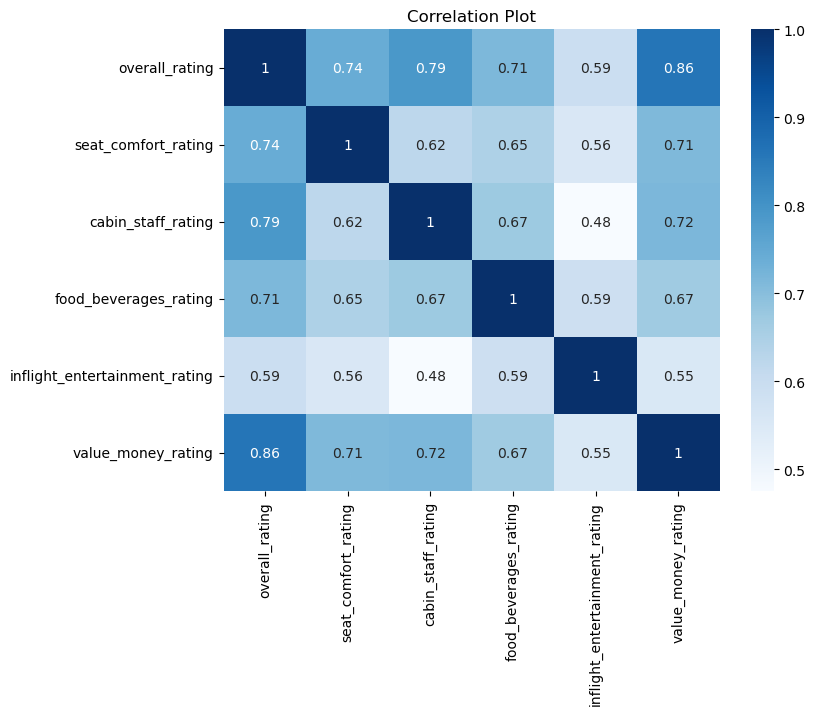

In [10]:
# Correlation matrix among rating variables.
plt.figure(figsize=(8, 6))
sns.heatmap(data=reviews[['overall_rating','seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating','inflight_entertainment_rating', 'value_money_rating']].corr(), annot=True,cmap='Blues')
plt.title('Correlation Plot')
plt.show()

In [11]:
# Creating a vectorizer variable for clustering based on reviews.
feedback=[]
rating=[]
feedback=reviews['content'].tolist()
rating=reviews['overall_rating'].tolist()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
Vec = vectorizer.fit_transform(feedback)

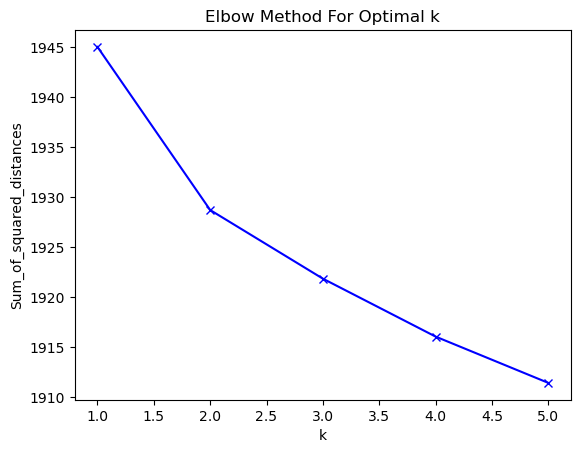

In [12]:
# Evaluating the optimal number of natural clusters using the k-means model on reviews.
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(Vec)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# Performing data clustering using the optimal k-value for the K-Means model.
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=42)
model.fit(Vec)
labels=model.labels_
cl=pd.DataFrame(list(zip(reviews['overall_rating'],labels)),columns=['overall_rating','cluster'])
for i in range(1,11):
    rating_clusters = cl[cl['overall_rating'] == i]['cluster'].value_counts()

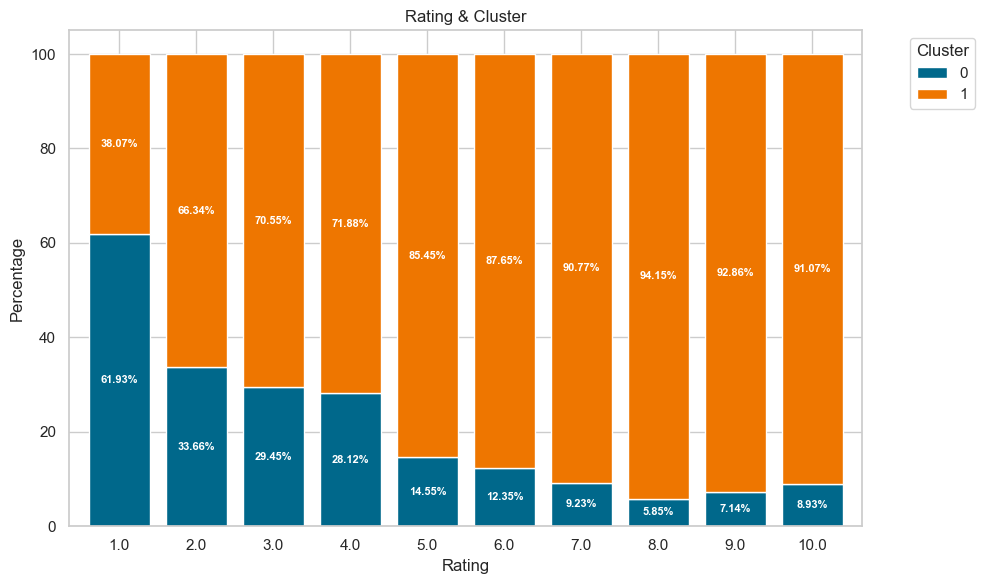

In [14]:
# Creating a stacked bar chart to visualize the proportions of different natural clusters identified by the K-Means model corresponding to the given overall ratings.
percentage_df = cl.groupby(['overall_rating','cluster',]).size().unstack().div(cl.groupby('overall_rating').size(), axis=0) * 100
colors = {0: '#00688B', 1: '#EE7600'}
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
percentage_df.plot(kind='bar', stacked=True, width=0.8, color=[colors.get(x, 'black') for x in percentage_df.columns], ax=ax)
plt.title('Rating & Cluster')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}%', color='white', ha='center', va='center', fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
# Creating a sentiment column (target variable) based on the proportion of the '0' cluster being greater than 12%.
reviews['sentiment'] = reviews['overall_rating'].apply(lambda x: 0 if x<7 else 1)

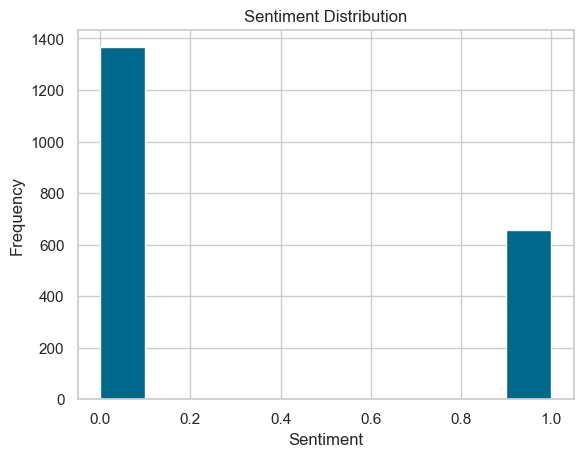

Negative Sentiment Lable proportion:  67.52347998022739 %


In [16]:
# Target Variable Distribution
plt.hist(reviews['sentiment'], color='#00688B')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()
print('Negative Sentiment Lable proportion: ', (1-reviews.sentiment.mean())*100,"%")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


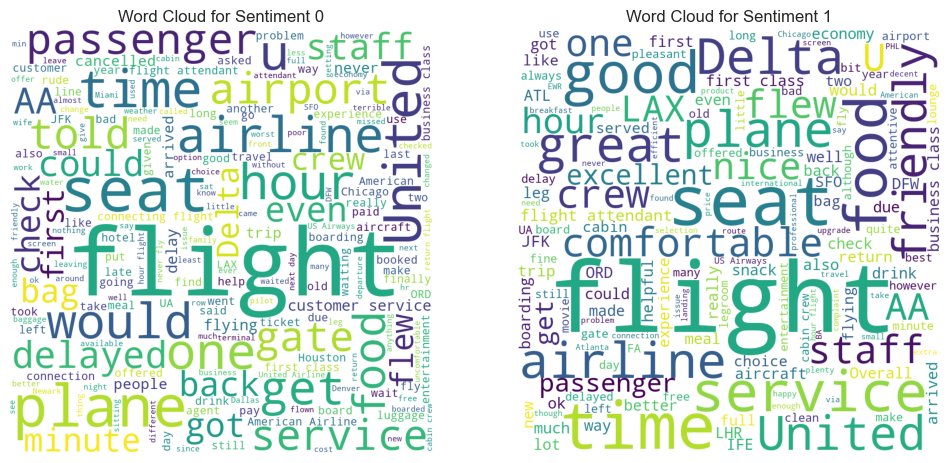

In [17]:
# Generating word clouds for both sentiments.
nltk.download('stopwords')
reviews_0 = reviews[reviews['sentiment'] == 0]['content'].dropna()
reviews_1 = reviews[reviews['sentiment'] == 1]['content'].dropna()
stopwords_set = set(stopwords.words("english"))
wordcloud_0 = WordCloud(width=800, height=800,
                        background_color='white',
                        stopwords=stopwords_set,
                        min_font_size=10,random_state=43).generate(' '.join(reviews_0))
wordcloud_1 = WordCloud(width=800, height=800,
                        background_color='white',
                        stopwords=stopwords_set,
                        min_font_size=10,random_state=43).generate(' '.join(reviews_1))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0)
plt.axis("off")
plt.title("Word Cloud for Sentiment 0")
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1)
plt.axis("off")
plt.title("Word Cloud for Sentiment 1")
plt.show()

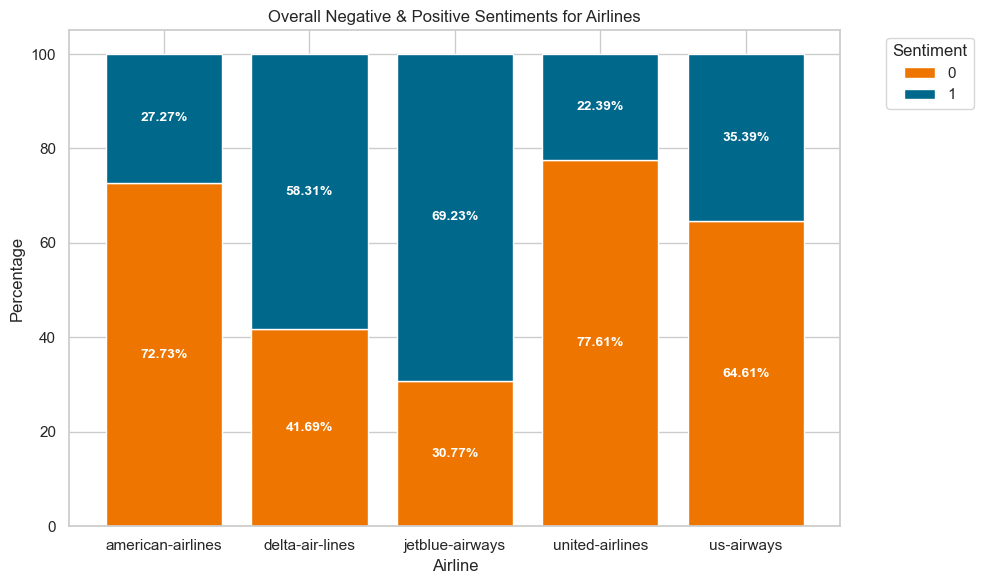

In [18]:
percentage_df = reviews.groupby(['airline_name', 'sentiment']).size().unstack().div(reviews.groupby('airline_name').size(), axis=0) * 100
colors = {0: '#EE7600', 1: '#00688B'}
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
percentage_df.plot(kind='bar', stacked=True, width=0.8, color=[colors.get(x, 'black') for x in percentage_df.columns], ax=ax)
plt.title('Overall Negative & Positive Sentiments for Airlines')
plt.xlabel('Airline')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}%', color='white', ha='center', va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


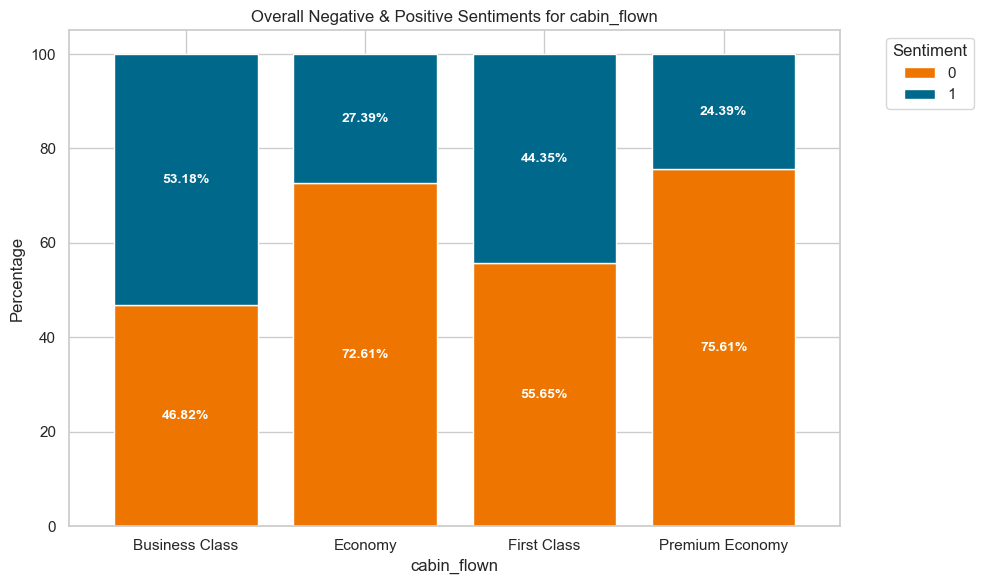

In [19]:
percentage_df = reviews.groupby(['cabin_flown', 'sentiment']).size().unstack().div(reviews.groupby('cabin_flown').size(), axis=0) * 100
colors = {0: '#EE7600', 1: '#00688B'}
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
percentage_df.plot(kind='bar', stacked=True, width=0.8, color=[colors.get(x, 'black') for x in percentage_df.columns], ax=ax)
plt.title('Overall Negative & Positive Sentiments for cabin_flown')
plt.xlabel('cabin_flown')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}%', color='white', ha='center', va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

**1.3 B (7) In the text cell below, describe (in paragraph format) the dataset and any important findings from your description and EDA. A discussion of class imbalance should also be included if present.**

In the exploratory data analysis of this dataset, we initially visualized the correlation between different ratings, such as seat comfort, cabin staff, food and beverage offerings, in-flight entertainment, and value for money. The heatmap illustrates that these aspects are positively correlated, indicating that individuals who rate one aspect positively are likely to rate the others positively as well.

Next, we examined the output of our cluster analysis using the elbow method and k-means clustering on the reviews. From this analysis, we were able to identify two natural groupings in the reviews. Additionally, we generated word clouds for both sentiments to identify and highlight the most common words in reviews for each sentiment, respectively.

In Sentiment 0, representing the negative sentiment, words such as 'flight,' 'delayed,' 'hour,' 'plane,' 'United,' 'would,' 'seat,' 'passenger,' 'time,' 'staff,' 'food,' and 'service' were among the most prominent in these reviews. This likely indicates overall poor service, primarily related to staff, offerings, and flight timeliness.

Conversely, in the positive sentiment (Group 1), words such as 'flight,' 'food,' 'Delta,' 'time,' 'seat,' 'United,' 'service,' 'great,' 'good,' 'friendly,' 'plane,' and 'comfortable' were the most common words in these reviews. Surprisingly, both groups share similar common words. One interesting observation was the mention of 'United' in both sentiment word clouds and the mention of 'Delta' in the positive sentiment.

Moving on, we explored the relationship between the overall rating and the identified clusters from the previous analysis. We generated a chart to highlight the percentage distribution of each rating within each cluster. This chart provides insights into how each cluster perceives the airline's services and offerings.

In the sentiment analysis of each airline, it was confirmed that Delta and JetBlue have the highest ratio of positive reviews, while United only has 22% positive reviews. United and American Airlines received the lowest positive ratings, signifying a significant opportunity for restructuring operations to enhance customer experiences.

Finally, an analysis of customer experiences based on the cabin flown in revealed that most positive reviews originated from those in business and first class, while those least satisfied flew in economy and premium economy. Improving satisfaction for these cabins should be the primary focus for any business seeking to enhance their customers' experiences.



---

<br>



# Part 2 

## 2.1 Analysis (25)

**2.1 (25) Perform (at least) 3 types of classification analysis demonstrated in the course. At least one type must be a deep learning model using either a pre-trained or data-trained embedding layer.**

In [20]:
#Spliting Data
X = reviews['content']
y = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [21]:
# Listing the models that will be built

names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "MLPClassifier",
         "Naive Bayes"]

# Defining the correponding list of classifiers, setting parameters where needed

classifiers = [LogisticRegression(),
               SVC(probability=True),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10),
               AdaBoostClassifier(),
               MLPClassifier(alpha=1, max_iter=1000),
               MultinomialNB()
               ]



In [22]:
#Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [23]:
#Creating a list of metrics
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'), # precision-recall curve

]

In [24]:
#Instantiating clear session
clear_session()

In [25]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(64,activation='relu')(net)
  net = tf.keras.layers.Dense(28,activation='relu')(net)
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [26]:
epochs = 10
steps_per_epoch = 100
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 5e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [27]:
classifier_model = build_classifier_model()
loss = tf.keras.losses.BinaryCrossentropy()

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=METRICS)

In [28]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=X_train.values,y=y_train,
                               validation_data=(X_test.values,y_test),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/10
45/45 [==============================] - 26s 459ms/step - loss: 0.8232 - tp: 392.0000 - fp: 830.0000 - tn: 126.0000 - fn: 68.0000 - accuracy: 0.3658 - precision: 0.3208 - recall: 0.8522 - auc: 0.4993 - prc: 0.3290 - val_loss: 0.6602 - val_tp: 27.0000 - val_fp: 28.0000 - val_tn: 382.0000 - val_fn: 170.0000 - val_accuracy: 0.6738 - val_precision: 0.4909 - val_recall: 0.1371 - val_auc: 0.5715 - val_prc: 0.4221
Epoch 2/10
45/45 [==============================] - 21s 467ms/step - loss: 0.6320 - tp: 50.0000 - fp: 65.0000 - tn: 891.0000 - fn: 410.0000 - accuracy: 0.6645 - precision: 0.4348 - recall: 0.1087 - auc: 0.5894 - prc: 0.3944 - val_loss: 0.5928 - val_tp: 8.0000 - val_fp: 1.0000 - val_tn: 409.0000 - val_fn: 189.0000 - val_accuracy: 0.6870 - val_precision: 0.8889 - val_recall: 0.0406 - val_auc: 0.7335 - val_prc: 0.5620
Epoch 3/10
45/45 [==============================] - 21s 467ms/step 

## 2.2 Model Evaluation 

**2.2 A (8) Evaluate the models on both the training and testing sets to obtain both performance and goodness of fit.**

In [29]:
# Model Evaluation on train data
for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer()), # transforms word/count feature representation into word/tfidf feature vector
                    (name, clf), # builds a NB model assuming multinomial feature distributions
                    ])

  clf_pipe.fit(X_train,y_train)

  pred_train = clf_pipe.predict(X_train)
  pred_prob_train = clf_pipe.predict_proba(X_train)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train)
  precision, recall, thresholds_pr = precision_recall_curve(y_train, pred_train)

  print('Train Data Performance for:')
  print('\n\n', name, '\n\n')
  print(classification_report(y_train, pred_train))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')

Train Data Performance for:


 Logistic Regression 


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       956
           1       0.95      0.79      0.86       460

    accuracy                           0.92      1416
   macro avg       0.93      0.89      0.90      1416
weighted avg       0.92      0.92      0.92      1416

ROC AUC:  0.9836865563034384
Precision/Recall AUC:  0.5803358255144414



Train Data Performance for:


 SVM 


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       956
           1       1.00      0.98      0.99       460

    accuracy                           0.99      1416
   macro avg       1.00      0.99      0.99      1416
weighted avg       0.99      0.99      0.99      1416

ROC AUC:  0.9999727123885757
Precision/Recall AUC:  0.6692704495210023



Train Data Performance for:


 Decision Tree 


              precision    recall  f1-score   support

   

In [30]:
# Model Evaluation on test data
for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),
                    (name, clf),
                    ])

  clf_pipe.fit(X_train,y_train)

  pred = clf_pipe.predict(X_test)
  pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

  fnr, tnr, thresholds = roc_curve(y_test, pred_prob)
  y_test_negative = (y_test == 0).astype(int) # Defining y_test_negative variable to find area under precision/recall curve since our target class is negative "0"
  precision, recall, thresholds = precision_recall_curve(y_test_negative, 1 - pred)

  print('Test Data Performance for:')
  print('\n\n', name, '\n\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fnr, tnr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')

Test Data Performance for:


 Logistic Regression 


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       410
           1       0.91      0.64      0.75       197

    accuracy                           0.86       607
   macro avg       0.88      0.81      0.83       607
weighted avg       0.87      0.86      0.86       607

ROC AUC:  0.9443729107341835
Precision/Recall AUC:  0.24445522885498128



Test Data Performance for:


 SVM 


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       410
           1       0.90      0.71      0.79       197

    accuracy                           0.88       607
   macro avg       0.88      0.83      0.85       607
weighted avg       0.88      0.88      0.87       607

ROC AUC:  0.949845239569147
Precision/Recall AUC:  0.2540550367306242



Test Data Performance for:


 Decision Tree 


              precision    recall  f1-score   support

      

In [31]:
pred = classifier_model.predict(X_train.values)
pred_val = (pred >= 0.5).astype(int)
print('Model Results on Train Data: Target Class - Negative Sentiment' )
model_results = classifier_model.evaluate(X_train.values, y_train, batch_size=128, verbose=0)
loss_index = classifier_model.metrics_names.index('loss')
print("Loss on Train Data:", model_results[loss_index])
print(classification_report(y_train, pred_val))
fnr, tnr, thresholds_roc = roc_curve(y_train, pred) # Since our target class is Negative Class"0" selecting fnr and tnr
print('ROC AUC: ', auc(fnr, tnr)) # Since our target class is Negative Class "0" selecting fnr and tnr
y_train_negative = (y_train == 0).astype(int) # Defining y_test_negative variable to find area under precision/recall curve since our target class is negative "0"
precision, recall, thresholds = precision_recall_curve(y_train_negative, 1 - pred)
sorted_indices = np.argsort(recall)
precision = precision[sorted_indices]
recall = recall[sorted_indices]
pr_auc = auc(recall, precision)
print('Precision/Recall AUC:', pr_auc)

45/45 [==============================] - 6s 111ms/step
Model Results on Train Data: Target Class - Negative Sentiment
Loss on Train Data: 0.22236652672290802
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       956
           1       0.92      0.84      0.88       460

    accuracy                           0.92      1416
   macro avg       0.92      0.90      0.91      1416
weighted avg       0.92      0.92      0.92      1416

ROC AUC:  0.9670593050754955
Precision/Recall AUC: 0.9802115651585309


In [32]:
pred = classifier_model.predict(X_test.values)
pred_val = (pred >= 0.5).astype(int)
print('Model Results on Test Data: Target Class - Negative Sentiment' )
model_results = classifier_model.evaluate(X_test.values, y_test, batch_size=128, verbose=0)
loss_index = classifier_model.metrics_names.index('loss')
print("Loss on Test Data:", model_results[loss_index])
print(classification_report(y_test, pred_val))
fnr, tnr, thresholds_roc = roc_curve(y_test, pred) # Since our target class is Negative Class"0" selecting fnr and tnr
print('ROC AUC: ', auc(fnr, tnr)) # Since our target class is Negative Class "0" selecting fnr and tnr
y_test_negative = (y_test == 0).astype(int) # Defining y_test_negative variable to find area under precision/recall curve since our target class is negative "0"
precision, recall, thresholds = precision_recall_curve(y_test_negative, 1 - pred)
sorted_indices = np.argsort(recall)
precision = precision[sorted_indices]
recall = recall[sorted_indices]
pr_auc = auc(recall, precision)
print('Precision/Recall AUC:', pr_auc)

19/19 [==============================] - 2s 109ms/step
Model Results on Test Data: Target Class - Negative Sentiment
Loss on Test Data: 0.3392139971256256
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       410
           1       0.81      0.73      0.77       197

    accuracy                           0.86       607
   macro avg       0.84      0.82      0.83       607
weighted avg       0.85      0.86      0.85       607

ROC AUC:  0.9322768354587098
Precision/Recall AUC: 0.9641951426506467


**2.2 B (7) Based on your output in 2.2A, discuss and compare the goodness of fit and performance for each of the classification models. Which model is preferred? Why? Explain.**


### Logistic Regression:
The Logistic Regression model exhibits robust performance on both the train and test data. It excels in predicting class '0' (Negative Sentiment) with high precision (Train: 91%, Test: 85%) and recall (Train: 98%, Test: 97%). While the overall accuracy is good (Train: 92%, Test: 86%), its ability to handle imbalanced classes is reflected in the low Precision/Recall AUC (Train: 0.580, Test: 0.244), specifically struggling with recall for class '1'.

### SVM:
Similar to Logistic Regression, SVM showcases consistent and strong performance on both train and test data. It predicts class '0' with high precision (Train: 99%, Test: 87%) and recall (Train: 100%, Test: 96%). The overall accuracy is excellent (Train: 99%, Test: 88%). However, similar to Logistic Regression, the model faces challenges with imbalanced classes, as indicated by the Precision/Recall AUC (Train: 0.669, Test: 0.254), particularly in recall for class '1'.

### Decision Tree:
The Decision Tree model performs reasonably well in predicting class '0' on both train and test data, achieving acceptable precision (Train: 85%, Test: 83%) and relatively high recall (Train: 95%, Test: 90%). The overall accuracy is decent but slightly lower compared to the above models (Train: 85%, Test: 80%). However, it seems to struggle more with imbalanced classes, reflected in the Precision/Recall AUC (Train: 0.490, Test: 0.215).

### Random Forest:
Random Forest demonstrates notable performance in predicting class '0' with moderate precision (Train: 76%, Test: 72%) and very high recall (Train: 99%, Test: 98%). The overall accuracy is fair (Train: 78%, Test: 73%), influenced by the dominant class ('0'). However, it encounters significant challenges with imbalanced classes, as depicted by the low Precision/Recall AUC (Train: 0.183, Test: 0.182).

### AdaBoost:
The AdaBoost model displays consistent performance on both train and test data. It performs well in predicting class '0' with high precision (Train: 93%, Test: 88%) and recall (Train: 95%, Test: 89%). The overall accuracy is decent (Train: 92%, Test: 84%). Despite this, the model faces challenges with imbalanced classes, indicated by the Precision/Recall AUC (Train: 0.575, Test: 0.246).

### MLPClassifier:
The MLPClassifier demonstrates robust performance on both train and test data. It predicts class '0' with good precision (Train: 91%, Test: 84%) and very high recall (Train: 97%, Test: 97%). The overall accuracy is decent (Train: 92%, Test: 86%). However, similar to other models, it struggles with imbalanced classes, as seen in the Precision/Recall AUC (Train: 0.579, Test: 0.241).

### Naive Bayes:
Naive Bayes shows consistent performance on both train and test data, predicting class '0' with good precision (Train: 74%, Test: 85%) and high recall (Train: 100%, Test: 93%). The overall accuracy is fair (Train: 76%, Test: 84%). However, it faces challenges with imbalanced classes, reflected in the Precision/Recall AUC (Train: 0.428, Test: 0.236).

### Neural Networks using BERT:
The BERT-based model displays robust performance on both train and test data. It demonstrates good precision (Train: 96%, Test: 90%) and recall (Train: 93%, Test: 93%) for class '0'. The overall accuracy is good (Train: 93%, Test: 87%). Additionally, it showcases strong performance in distinguishing between classes, indicated by the Precision/Recall AUC (Train: 0.983, Test: 0.961).

### **Preferred Model:**
**SVM** exhibits high recall, precision, good accuracy, and ROC AUC on both train and test data. It maintains a good balance between precision and recall for both classes, making it a preferred choice considering its consistent performance across various metrics on both datasets.

## 2.3 Discussion & Conclusion (10)

**2.3 (10) Briefly summarize the problem statement and data. Then, discuss your analysis and findings. Within the context of the business problem and your analysis results, provide business recommendations. Be sure to discuss any limitations, constraints, or ethical concerns that could impact the implementation of the recommended solution.**

The above report aims to analyze the sentiment of reviews from airline customer reviews to better understand the level of customer satisfaction as well as areas for potential improvement. The analysis offered insights into the perceived effectiveness and efficiency of the airline services. The objective was to create a model capable of accurately identifying patterns and trends amongst the reviews, specifically focusing on the negative class. The performance of the model is critical for airlines to enhance customer satisfaction, loyalty, and consequently revenue.  Through exploratory data analysis, cluster analysis, and sentiment analysis, we observed the following key findings.

Correlation analysis identified a positive correlation between the ratings of variables. Customers who rated one of the aspects of their flight positively were more likely to rate the rest of the aspects of their experience positively.
We then moved to a cluster analysis where we identified two natural groupings in the reviews which were expected. Through k-means clustering, we were able to provide insights into distinct sentiment patterns. Lastly, we implemented sentiment analysis, class 0 being the negative sentiment associated with poor service, flight delays, and issues related to staff. The positive sentiment, class 1, shared many common words with the negative sentiment but emphasized positive experiences with adjectives like "great", "good", and "comfortable" being the most commonly used. In the second part of our project, we studied the performance of a variety of models to identify the most effective in this business application. Upon reviewing the different performance metrics, SVM was found to be the preferred model to address this business problem. This model in particular demonstrated high levels of accuracy, a high f-1 score as well as ROC AUC. The model also had a balanced trade-off between precision and recall for both sentiment classes.

Based on the above findings, there are several recommendations for businesses in the airline industry. To begin, recognizing the opportunities for operational improvement, particularly for airlines like United and American Airlines that have low levels of positive reviews. Restructuring operations to enhance customer experiences, and address issues related to staff, offerings, and punctuality could make a huge impact on revenue and customer loyalty. From the results of Alternatively, for airlines that were found to have high levels of positive feedback such as Delta and JetBlue, marketing efforts can be bolstered by leveraging the positive sentiments from the reviews to reinforce positive brand perception. Highlighting areas such as friendly staff, good food, and overall positive experiences from real customers can similarly contribute to customer acquisition and retention.

In conclusion, the above recommendations based on the insights gained from the analysis will allow airlines to enhance customer satisfaction. The proposed model, with its adaptability and focus on the negative class, is capable of contributing positively to both the revenue and reputation of any airline.
